# EDA of ML-Latest-small Dataset

In [ ]:
!wget -q --show-progress http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    
Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import urllib.request
import sys
import os

In [ ]:
DOWNLOAD_DESTINATION_DIR = '/content/ml-latest-small'

In [ ]:
ratings_path = os.path.join(DOWNLOAD_DESTINATION_DIR, 'ratings.csv')
ratings = pd.read_csv(
    ratings_path,
    sep=',',
    names=["userid", "itemid", "rating", "timestamp"],
    skiprows=1
)

movies_path = os.path.join(DOWNLOAD_DESTINATION_DIR, 'movies.csv')
movies = pd.read_csv(
    movies_path,
    sep=',',
    names=["itemid", "title", "genres"],
    encoding='latin-1',
    skiprows=1
)

In [ ]:
ratings.head()

userid  itemid  rating  timestamp
0       1       1     4.0  964982703
1       1       3     4.0  964981247
2       1       6     4.0  964982224
3       1      47     5.0  964983815
4       1      50     5.0  964982931

In [ ]:
movies.head()

itemid  ...                                       genres
0       1  ...  Adventure|Animation|Children|Comedy|Fantasy
1       2  ...                   Adventure|Children|Fantasy
2       3  ...                               Comedy|Romance
3       4  ...                         Comedy|Drama|Romance
4       5  ...                                       Comedy

[5 rows x 3 columns]

### Histogram of ratings

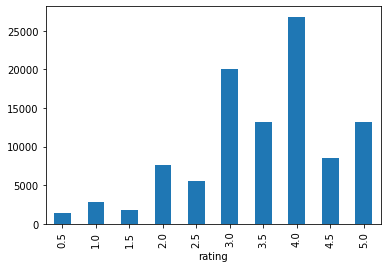

In [ ]:
ratings.groupby('rating').size().plot(kind='bar')

Ratings range from 0.5 to 5.0, with a step of 0.5. The above histogram presents the repartition of ratings in the dataset. the two most commun ratings are 4.0 and 3.0 and the less commun ratings are 0.5 and  1.5

### Average ratings of movies

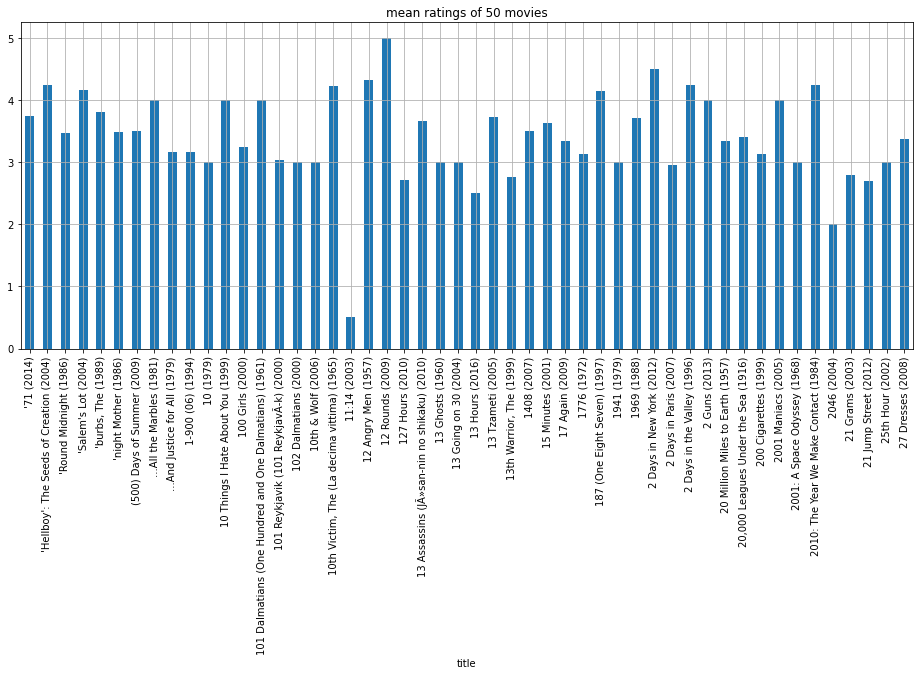

In [ ]:
movie_means = ratings.join(movies['title'], on='itemid').groupby('title').rating.mean()
movie_means[:50].plot(kind='bar', grid=True, figsize=(16,6), title="mean ratings of 50 movies")

### 30 most rated movies vs. 30 less rated movies

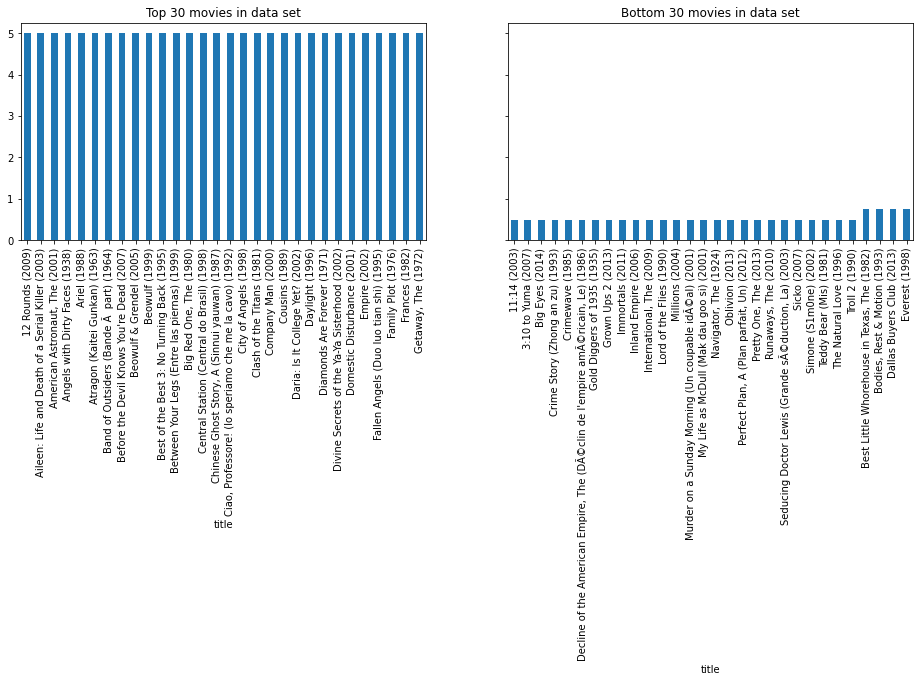

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4), sharey=True)
movie_means.nlargest(30).plot(kind='bar', ax=ax1, title="Top 30 movies in data set")
movie_means.nsmallest(30).plot(kind='bar', ax=ax2, title="Bottom 30 movies in data set")

---

In [ ]:
!pip install -q watermark
%reload_ext watermark
%watermark -a "Sparsh A." -m -iv -u -t -d

Author: Sparsh A.

Last updated: 2021-11-27 13:37:40

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.104+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

sys       : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas    : 1.1.5
IPython   : 5.5.0
matplotlib: 3.2.2



---

**END**